# Question 

Write the monthly email update based on the data set provided, with your findings written in order
of importance (#1 being the most important issue you would like to point out). Where possible, describe the
cause of the issues you identify based on the available data

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics import tsaplots

In [2]:
%matplotlib inline

In [51]:
#reading data from xlsx  
dataset1_sheet1 = pd.read_excel('Analytics_Exam_Data_Sets.xlsx', sheet_name =0)
dataset1_sheet2 = pd.read_excel('Analytics_Exam_Data_Sets.xlsx', sheet_name =1)
dataset1_sheet3 = pd.read_excel('Analytics_Exam_Data_Sets.xlsx', sheet_name =2)
dataset2 = pd.read_excel('Analytics_Exam_Data_Sets.xlsx', sheet_name =3)

In [8]:
def quality_report(data):

    """This method will do a basic data quality report for a data frame"""
        
    if (type(data) != pd.core.frame.DataFrame):
        raise TypeError("Data must be pandas.core.frame.DataFrame")
    else: 
        columns = list(data.columns.values)
        data_type = pd.DataFrame(data.dtypes, columns=['Data type'])
        missing_data = pd.DataFrame(
        data.isnull().sum(), columns=['missing values'])
        present_data = pd.DataFrame(data.count(), columns=['present values'])
        unique_values = pd.DataFrame(columns=['unique values'])
        minimum_values = pd.DataFrame(columns=['minimum values'])
        max_values = pd.DataFrame(columns=['maximun values'])
        
        for i in columns:
            unique_values.loc[i] = [data[i].nunique()]
            try:
                minimum_values.loc[i] = [data[i].min()]
                max_values.loc[i] = [data[i].max()]
            except:
                pass
        
        DQ_report = data_type.join(missing_data).join(present_data).join(
        unique_values).join(minimum_values).join(max_values)
    
    return DQ_report

In [5]:
def get_histogram(data,column,bins):
    
    """This method will return a matplotlib.pyplot object Histogram from a passed
    column of a pandas Dataframe"""
    
        
    if (type(data) != pd.core.frame.DataFrame):
        raise TypeError("Data must be pandas.core.frame.DataFrame")
    
    elif (type(column) != str):
        raise TypeError("Column must be srt type")
    
    elif (not np.issubdtype(data[column].dtype,np.integer) and data[column].dtype != float):
        raise TypeError("dtype of the column must be numeric type")
        
    else:
        d_limit,u_limit= min(data[column]),max(data[column])
        plt.hist(data[column],bins=bins,facecolor='blue',range=[d_limit, u_limit])
        plt.title('Histogram of column:' + column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        return plt

In [6]:
def get_pie_chart(data,column,labels,groupedby):
    """This method will show a pylab object pie chart given a 
    column of a pandas Dataframe"""
    
    if (type(data) != pd.core.frame.DataFrame):
        raise TypeError("Data must be pandas.core.frame.DataFrame")
    
    elif (type(column) != str):
        raise TypeError("Column must be srt type")
        
    elif (type(labels) != list):
        raise TypeError("labels must be a list")
        
    elif (type(column) != str):
        raise TypeError("groupedby must be srt type")
    
    else:
        buyers_bycountry_proportions=data[column]/data[column].sum()

        # make a square figure and axes
        figure(1, figsize=(6,6))
        ax = axes([0.1, 0.1, 0.8, 0.8])

        # The labels will be ordered and plotted counter-clockwise.

        pie(buyers_bycountry_proportions,labels=labels,
                        autopct='%1.1f%%', shadow=True, startangle=90)
                        # The default startangle is 0, which would start
                        # the Frogs slice on the x-axis.  With startangle=90,
                        # everything is rotated counter-clockwise by 90 degrees,
                        # so the plotting starts on the positive y-axis.

        title(column + ' by ' + groupedby, bbox={'facecolor':'0.8', 'pad':5})
        show()

## Sheet 1 Country

### Data

In [22]:
dataset1_sheet1.head(15)

,Date,Country,Visits,Signups,Buyers
0,2014-05-01,Australia,940,108,8
1,2014-05-02,Australia,917,101,8
2,2014-05-03,Australia,433,45,4
3,2014-05-04,Australia,518,42,3
4,2014-05-05,Australia,825,105,9
5,2014-05-06,Australia,918,107,8
6,2014-05-07,Australia,1067,91,9
7,2014-05-08,Australia,985,93,9
8,2014-05-09,Australia,805,93,6
9,2014-05-10,Australia,398,36,3


### Data Quality report 

In [9]:
quality_report(dataset1_sheet1)

,Data type,missing values,present values,unique values,minimum values,maximun values
Date,datetime64[ns],0,155,31,2014-05-01 00:00:00,2014-05-31 00:00:00
Country,object,0,155,5,Australia,India
Visits,int64,0,155,122,359,1345
Signups,int64,0,155,71,32,131
Buyers,int64,0,155,10,1,10


### Histograms for each attribute (Visits, Signups, Buyers)

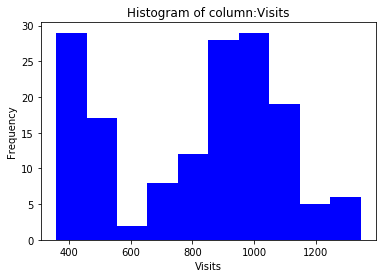

In [10]:
get_histogram(dataset1_sheet1,'Visits',10).show()

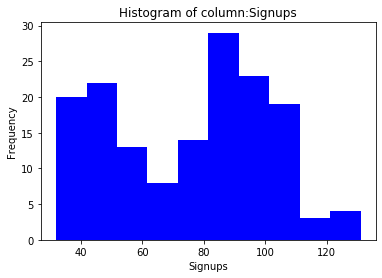

In [11]:
get_histogram(dataset1_sheet1,'Signups',10).show()

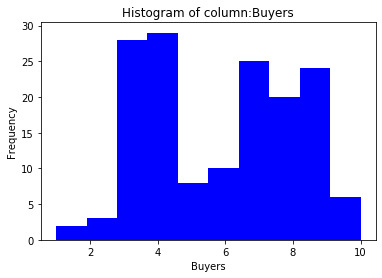

In [12]:
get_histogram(dataset1_sheet1,'Buyers',10).show()

### Group by contry with sum as aggregation function 

Total for each attribute by country

In [13]:
dataset1_bycountry=dataset1_sheet1.groupby('Country',as_index=True).sum()
dataset1_bycountry

,Visits,Signups,Buyers
Country,,,
Australia,24974,2343,187
Canada,25977,2374,185
GB,25115,2334,181
Germany,24583,2375,186
India,24994,2346,180


### Pie chart for each attribute 

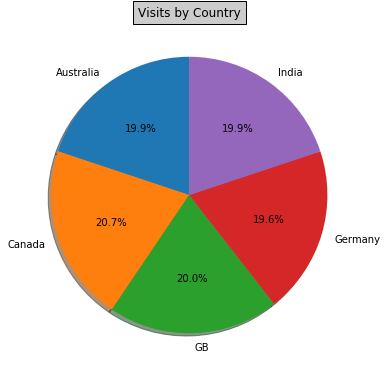

In [14]:
get_pie_chart(dataset1_bycountry,'Visits',['Australia','Canada','GB','Germany','India'],'Country')

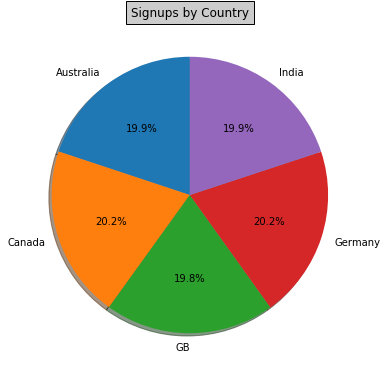

In [15]:
get_pie_chart(dataset1_bycountry,'Signups',['Australia','Canada','GB','Germany','India'],'Country')

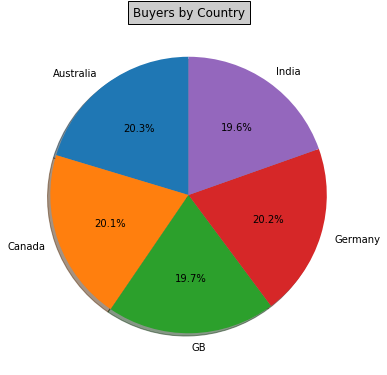

In [16]:
get_pie_chart(dataset1_bycountry,'Buyers',['Australia','Canada','GB','Germany','India'],'Country')

### Group by contry with mean as aggregation function 

Attributes daily mean for this month of data

In [17]:
dataset1_sheet1.groupby('Country',as_index=True).mean()

,Visits,Signups,Buyers
Country,,,
Australia,805.612903,75.580645,6.032258
Canada,837.967742,76.580645,5.967742
GB,810.161290,75.290323,5.838710
Germany,793.000000,76.612903,6.000000
India,806.258065,75.677419,5.806452


## Sheet 2 Operating system

### Data

In [24]:
dataset1_sheet2.head(15)

,Date,OS,Visits,Signups,Buyers
0,2014-05-01,Windows,1342,242,19
1,2014-05-02,Windows,1210,225,21
2,2014-05-03,Windows,684,127,10
3,2014-05-04,Windows,682,116,8
4,2014-05-05,Windows,1215,239,21
5,2014-05-06,Windows,1428,281,18
6,2014-05-07,Windows,1424,253,20
7,2014-05-08,Windows,1380,233,21
8,2014-05-09,Windows,1313,217,16
9,2014-05-10,Windows,640,98,6


### Data Quality report 

In [25]:
quality_report(dataset1_sheet2)

,Data type,missing values,present values,unique values,minimum values,maximun values
Date,datetime64[ns],0,93,31,2014-05-01 00:00:00,2014-05-31 00:00:00
OS,object,0,93,3,Mac,iOS
Visits,int64,0,93,84,559,4234
Signups,int64,0,93,80,15,281
Buyers,int64,0,93,22,1,22


### Histograms for each attribute (Visits, Signups, Buyers)

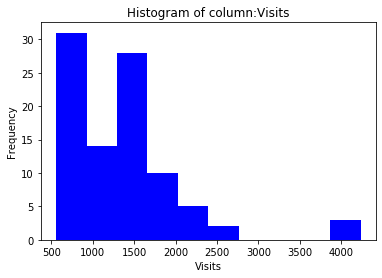

In [26]:
get_histogram(dataset1_sheet2,'Visits',10).show()

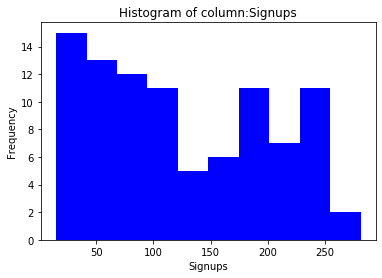

In [27]:
get_histogram(dataset1_sheet2,'Signups',10).show()

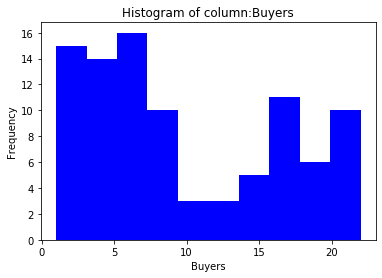

In [28]:
get_histogram(dataset1_sheet2,'Buyers',10).show()

### Group by Operating system with sum as aggregation function 

Total for each attribute by OS

In [30]:
dataset1_byOS=dataset1_sheet2.groupby('OS',as_index=True).sum()
dataset1_byOS

,Visits,Signups,Buyers
OS,,,
Mac,34210,4592,368
Windows,34634,5778,438
iOS,56799,1402,113


### Pie chart for each attribute 

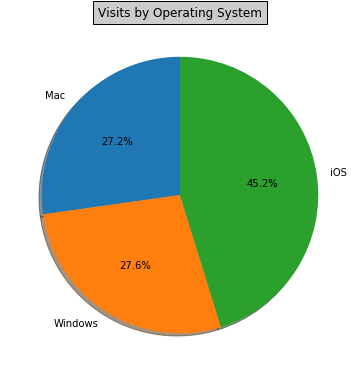

In [31]:
get_pie_chart(dataset1_byOS,'Visits',['Mac','Windows','iOS'],'Operating System')

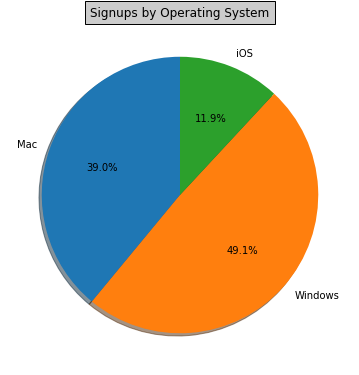

In [32]:
get_pie_chart(dataset1_byOS,'Signups',['Mac','Windows','iOS'],'Operating System')

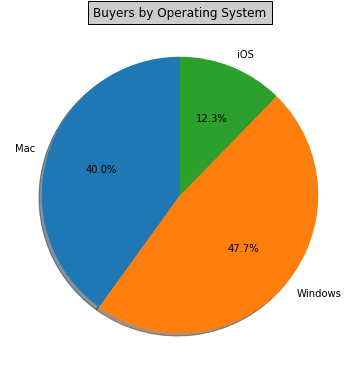

In [33]:
get_pie_chart(dataset1_byOS,'Buyers',['Mac','Windows','iOS'],'Operating System')

### Group by OS with mean as aggregation function 

Attributes daily mean for this month of data

In [34]:
dataset1_sheet2.groupby('OS',as_index=True).mean()

,Visits,Signups,Buyers
OS,,,
Mac,1103.548387,148.129032,11.870968
Windows,1117.225806,186.387097,14.129032
iOS,1832.225806,45.225806,3.645161


## Sheet 3 Marketplace

### Data

In [35]:
dataset1_sheet3.head(15)

,Date,Market,Visits,Signups,Buyers
0,2014-05-01,ThemeForest,1343,158,13
1,2014-05-02,ThemeForest,1334,161,13
2,2014-05-03,ThemeForest,775,80,7
3,2014-05-04,ThemeForest,777,78,5
4,2014-05-05,ThemeForest,1519,162,13
5,2014-05-06,ThemeForest,1581,174,12
6,2014-05-07,ThemeForest,1626,152,12
7,2014-05-08,ThemeForest,1576,146,14
8,2014-05-09,ThemeForest,1482,136,10
9,2014-05-10,ThemeForest,751,66,4


### Data Quality report 

In [37]:
quality_report(dataset1_sheet3)

,Data type,missing values,present values,unique values,minimum values,maximun values
Date,datetime64[ns],0,93,31,2014-05-01 00:00:00,2014-05-31 00:00:00
Market,object,0,93,3,CodeCanyon,ThemeForest
Visits,int64,0,93,82,638,2242
Signups,int64,0,93,63,54,213
Buyers,int64,0,93,14,4,17


### Histograms for each attribute (Visits, Signups, Buyers)

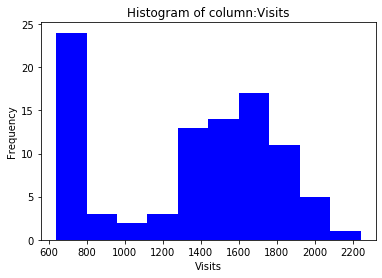

In [38]:
get_histogram(dataset1_sheet3,'Visits',10).show()

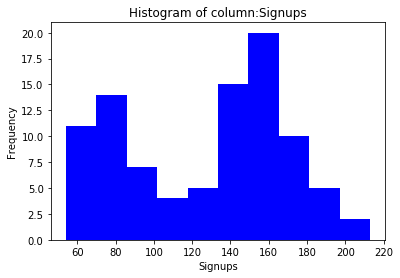

In [39]:
get_histogram(dataset1_sheet3,'Signups',10).show()

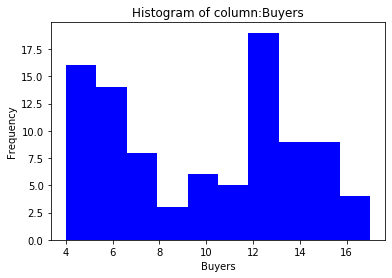

In [40]:
get_histogram(dataset1_sheet3,'Buyers',10).show()

### Group by Market with sum as aggregation function 

Total for each attribute by market

In [41]:
dataset1_bymarketplace=dataset1_sheet3.groupby('Market',as_index=True).sum()
dataset1_bymarketplace

,Visits,Signups,Buyers
Market,,,
CodeCanyon,40217,3819,298
GraphicRiver,44393,4177,320
ThemeForest,41033,3776,301


### Pie chart for each attribute 

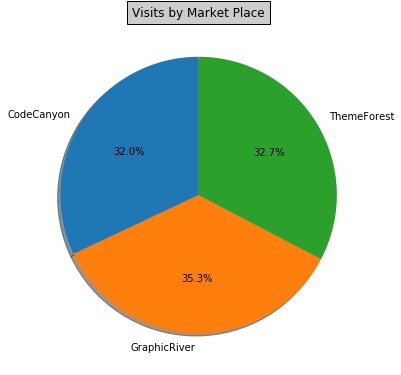

In [43]:
get_pie_chart(dataset1_bymarketplace,'Visits',['CodeCanyon','GraphicRiver','ThemeForest'],'Market Place')

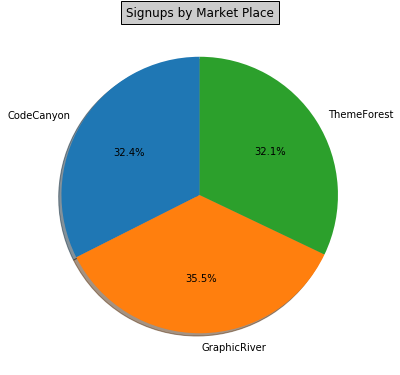

In [44]:
get_pie_chart(dataset1_bymarketplace,'Signups',['CodeCanyon','GraphicRiver','ThemeForest'],'Market Place')

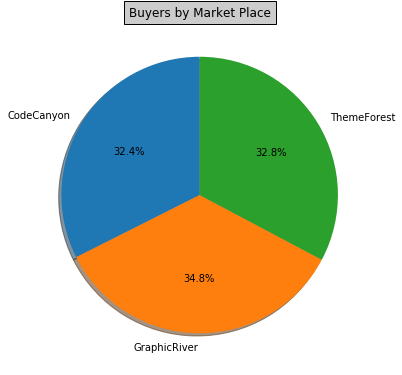

In [45]:
get_pie_chart(dataset1_bymarketplace,'Buyers',['CodeCanyon','GraphicRiver','ThemeForest'],'Market Place')

### Group by Market with mean as aggregation function 

Attributes daily mean for this month of data

In [46]:
dataset1_sheet3.groupby('Market',as_index=True).mean()

,Visits,Signups,Buyers
Market,,,
CodeCanyon,1297.322581,123.193548,9.612903
GraphicRiver,1432.032258,134.741935,10.322581
ThemeForest,1323.645161,121.806452,9.709677


## Q Answer: Monthly email update

To whom it may concern

After analyzing the data for the month of May, we have been able to identify a particular anomaly we would to point out:

* In the site traffic data by operating system, we have detected that we are having an abnormally poor user conversion rate for the IOS operating system. This month most of the users (45.2%) accessed our site from IOS and yet IOS got the lowest number of sign up and buyers. For Windows, which was the OS with the best user conversion rate, we see that 16.68% of its visitors signed up and 1.26% became a buyer, for IOS only 2.47% of its visitors signed up and 0.20% became buyers.

Since this anomaly is observed from the signing up step, we believe that visitors might be having problems to sign up from the IOS user interface, another possibility is that we might have a poor user experience for our IOS version of the site and visitors do not even get interested on signing up. 

We strongly suggest taking a look at these aspects of the IOS site as soon as possible since we are losing potential buyers, along with verifying we have the right marketing strategy for this market segment.

P.S. We have attached our analysis in case you need to get more details. 

Regards,  
Data analytics team

# Question, What seasonality trends do you identify in the data set? 

## Data

In [53]:
dataset2.head(15)

,Order_Date,Channel,site_name,payment_service,Buyers,Unit_Sales,Net_Revenue
0,2016-01-01,Affiliate,3docean,paypal,22.0,24.0,66.286
1,2016-01-01,Affiliate,activeden,paypal,11.0,12.0,180.256
2,2016-01-01,Affiliate,activeden,pre-paid,11.0,12.0,39.300
3,2016-01-01,Affiliate,audiojungle,paypal,280.0,304.0,2195.167
4,2016-01-01,Affiliate,audiojungle,pre-paid,89.0,105.0,602.207
5,2016-01-01,Affiliate,codecanyon,earnings,11.0,12.0,113.970
6,2016-01-01,Affiliate,codecanyon,paypal,2341.0,2832.0,21079.341
7,2016-01-01,Affiliate,codecanyon,pre-paid,863.0,1112.0,9106.989
8,2016-01-01,Affiliate,graphicriver,earnings,11.0,12.0,38.383
9,2016-01-01,Affiliate,graphicriver,paypal,1904.0,2866.0,8841.845


Since we are interested in identifying seasonality in the performance, we will only use the Order_Date and the Net_Renevenue columns of the dataset

In [66]:
sub_dataset2 = dataset2.loc[:,['Order_Date','Net_Revenue']]
sub_dataset2

,Order_Date,Net_Revenue
0,2016-01-01,66.286000
1,2016-01-01,180.256000
2,2016-01-01,39.300000
3,2016-01-01,2195.167000
4,2016-01-01,602.207000
...,...,...
198591,2018-06-30,11442.484562
198592,2018-06-30,8241.929059
198593,2018-06-30,71.927646
198594,2018-06-30,7510.891537


We have multiple observations for each day, so we will group the data to have the total Net revenue per day i.e. one data point per day

In [67]:
sub_dataset2=sub_dataset2.groupby('Order_Date',as_index=False).sum()

In [68]:
sub_dataset2

,Order_Date,Net_Revenue
0,2016-01-01,1.078485e+06
1,2016-01-02,1.082259e+06
2,2016-01-03,1.253622e+06
3,2016-01-04,1.668279e+06
4,2016-01-05,2.405778e+06
...,...,...
907,2018-06-26,1.281493e+06
908,2018-06-27,1.964692e+06
909,2018-06-28,2.757415e+06
910,2018-06-29,2.785434e+06


In [70]:
sub_dataset2['Order_Date'] = pd.to_datetime(sub_dataset2['Order_Date'])
sub_dataset2.set_index('Order_Date', inplace=True)

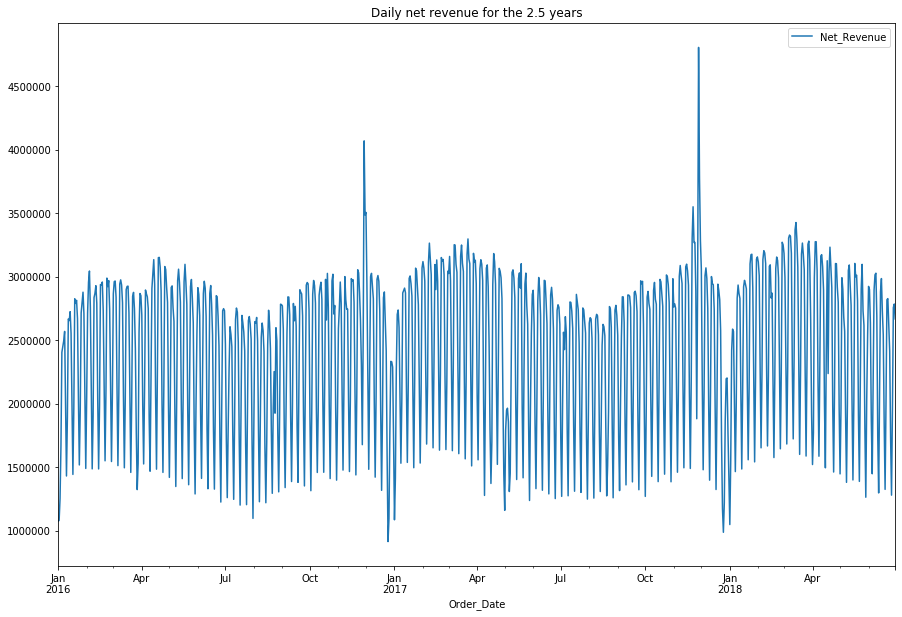

In [74]:
sub_dataset2.plot(figsize=(15,10), title='Daily net revenue for the 2.5 years')
plt.show()

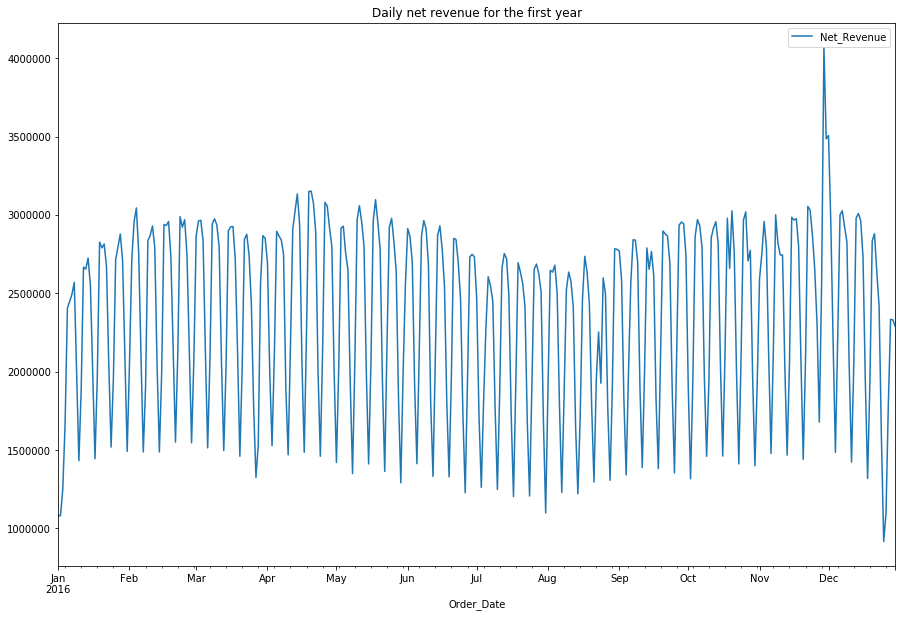

In [89]:
sub_dataset2.iloc[0:365,:].plot(figsize=(15,10), title='Daily net revenue for the first year')
plt.show()

## Automated time series decomposition 

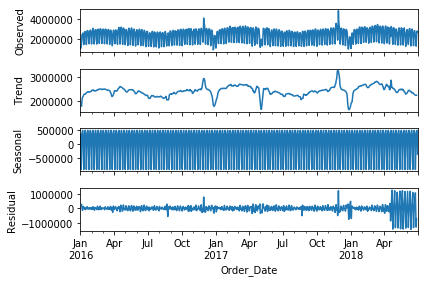

In [82]:
weekly_decomposition = seasonal_decompose(sub_dataset2, model='additive', freq=7) 
# freq equals to 7 due to weekly seasonality observed in previous plot
weekly_decomposition.plot()
plt.show()

## Trend component plot 

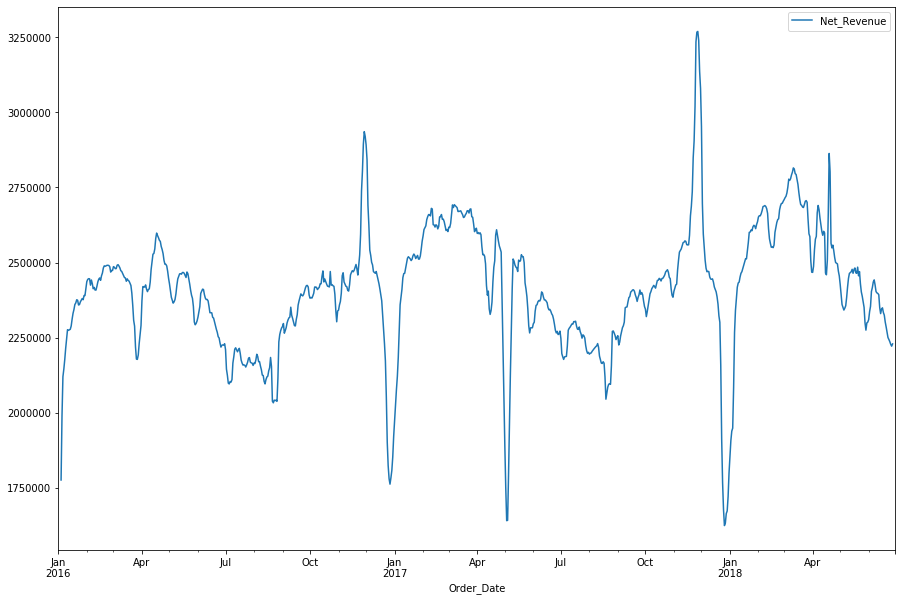

In [85]:
weekly_decomposition.trend.plot(figsize=(15,10))

## Seasonal component plots

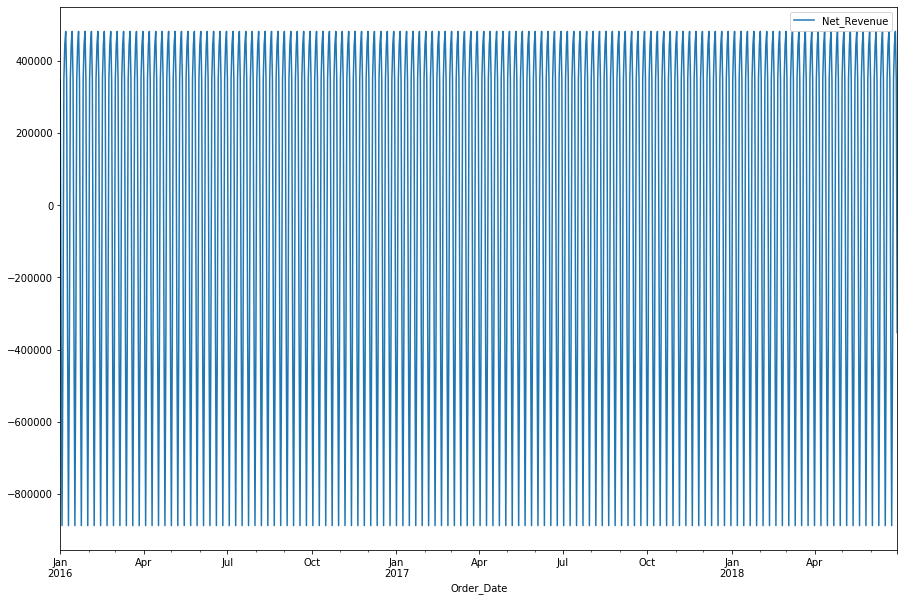

In [78]:
weekly_decomposition.seasonal.plot(figsize=(15,10))

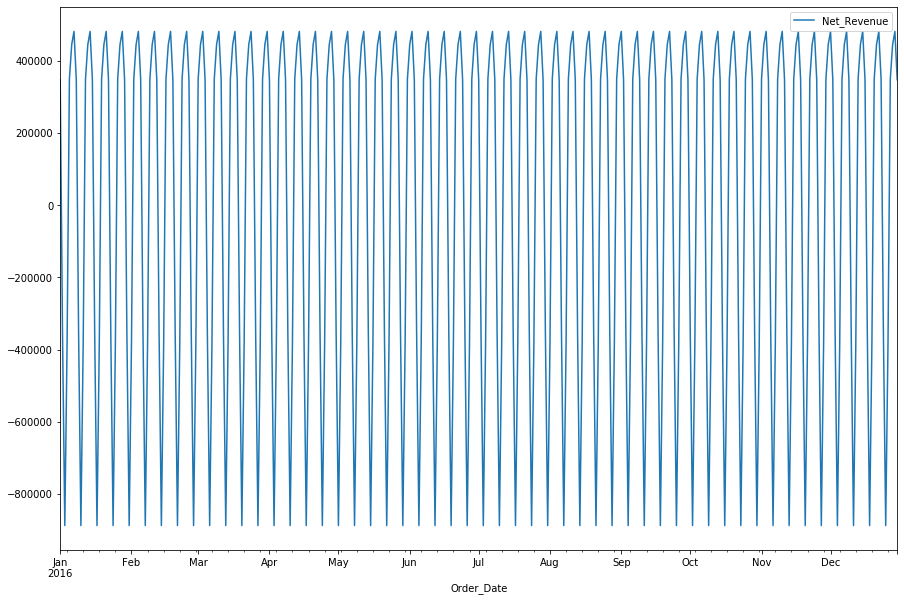

In [91]:
weekly_decomposition.seasonal.iloc[0:365,:].plot(figsize=(15,10)) #only first year to better see the weekly seasonal component 

## Noise component plot 

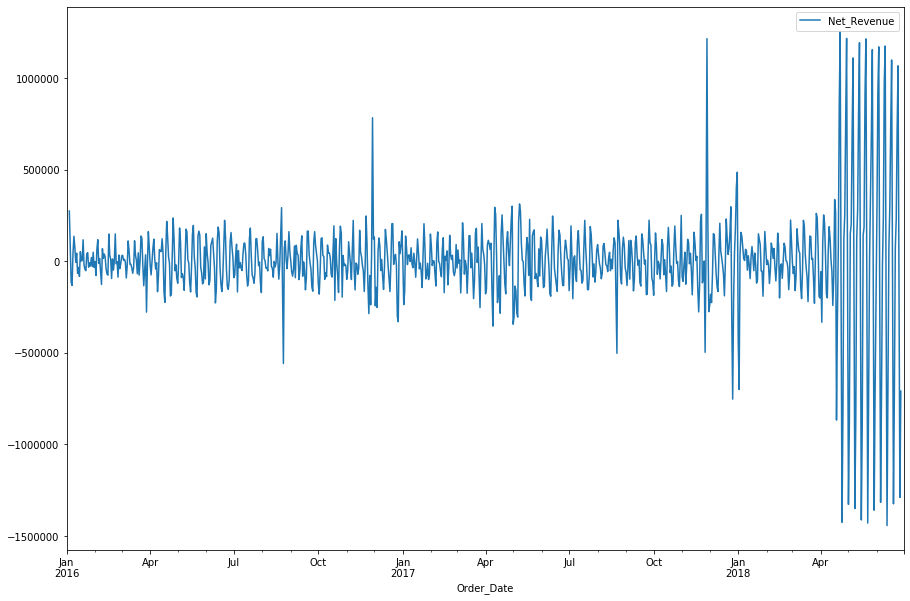

In [95]:
weekly_decomposition.resid.plot(figsize=(15,10))

## Autocorrelation function and Partial autocorrelation function

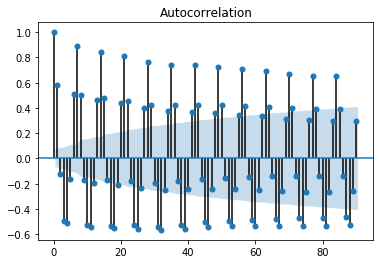

In [108]:
tsaplots.plot_acf(sub_dataset2, lags=90, alpha=.05)
plt.show()

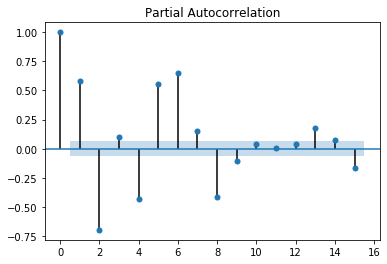

In [101]:
tsaplots.plot_pacf(sub_dataset2,lags=15,alpha=.05)
plt.show()

## Q Answer: What seasonality trends do you identify in the data set? 

In the 'Daily net revenue for the first year' plot, we can observe that we have a weekly seasonal component in this time series.

Econometrics tells us that a time series consists of 3 systematic components(level, trend and seasonality) that can be modeled and 1 non-systematic component (noise) that can not be directly modeled. 

Considering this time series components we have two models: 
* Additive model: Considers that the time series is a linear combination of the components.
* multiplicative model: Considers that the time series in a nonlinear combination of the components.

In the additive model the seasonality has a similar frequency and amplitude, taking a look at the plot we assumed we should use the additive model.

Using a simple-classical decomposition method we can separate these components, by decomposing the time series with a frequency of 7 days, we get more evidence of a weekly seasonal component.

We can also use the partial autocorrelation function in order to verify that lag number 7 is statistically significant with an alpha of 0.05 i.e. 95% confidence. 

# Question

 Considering the above seasonality trends, how would you present the data to see clearly a Daily trend?

## Seasonal Adjustment

In [128]:
diff_sub_dataset2 = sub_dataset2.diff(7)

Consider that with this method you will lose one seasonal cycle of data, in this case one week.

In [129]:
diff_sub_dataset2.head(15)

,Net_Revenue
Order_Date,
2016-01-01,NaN
2016-01-02,NaN
2016-01-03,NaN
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,1491363.867
2016-01-09,915432.192


## Seasonally adjusted series plot

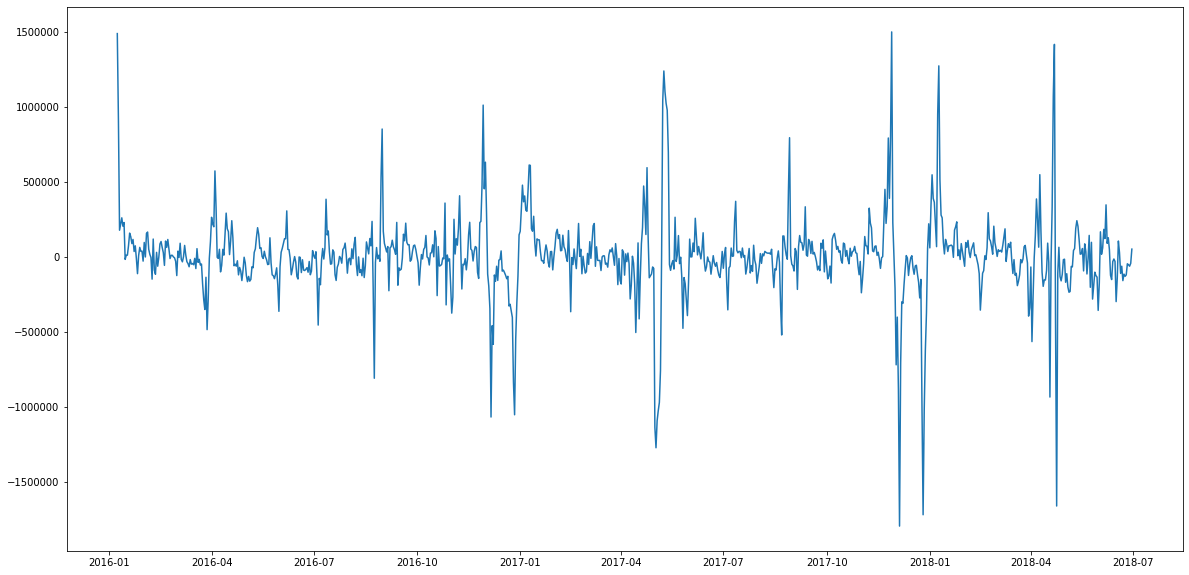

In [130]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(diff_sub_dataset2)
plt.show()

## Q answer: how would you present the data to see clearly a Daily trend?

The seasonal component can be removed from the time series, this process is called deseasonalizing or seasonal adjustment. A time series without seasonality is called seasonal stationary.

A simple method to adjust seasonality is differencing, the general intuition behind differencing is to compare each data point with the equivalent data point in the previous seasonal cycle. For this particular case, where we have daily data and a weekly seasonal component, in order to remove the seasonal component we would need to subtract each day of the week to the same day of the previous week. 

We could also try a more sophisticated approach such as modeling the seasonal component directly and then subtract it from the data observations in order to get the seasonally adjusted series.

# Question 

Considering the above seasonality trends, how would you present the data to see a Monthly
performance trend?


## Q answer: how would you present the data to see a Monthly performance trend?

The example of one approach I would take is:

Assumptions:

* We have the daily Net revenue for month 1 (Jan)

* Lets say that you just got the Net revenue of the first monday of the month 2 (Feb).

Approach:

* Take the net revenue value for all Mondays of month 1 and get the mean.
* [ (Net revenue first monday month2 - mean of previous month mondays) / mean of previous month mondays ] * 100

With this approach you would get the percentage change considering the weekly seasonlity component. 

# Question

What anomalies do you identify in the data set? (Hint: which month significantly underperforms
and why?)

## Q answer

Anomalies I identified:

* We can see in the 'Daily net revenue for the 2.5 years' plot that the dates that significantly underperformed , are at the end of each year and beginnings of the next one, this could be due to the called 'January effect' , the January effect suggests that there is a seasonal anomaly in the economy. 
* Another anomaly in the data set is observed in the Noise component of the time series, we see a significant increase in the noise for the last months of the data. 

# Question 8

The analysis team is providing services to a few departments in the company, between them are the
user acquisition team, the CRM team and the product team.
Please define and detail the main KPIs you think each department should be measured by and track
regularly.

## Q answer


### User acquisition team KPIs:

* Business performance metrics(avg cost of a user adquisition) = total user adquisiton spends by period/ number of users adquiered in the same period.
* User convertion rate = number of buyers in a period / number of visits in same period


### CRM(customer relationship management) team KPIs:

* Quantitave customer service ( customer retention rate,avg problem solving time,number of customer complains)
  - customer retention rate = (number of customers at end of period minus new customers) / number of customers at beginning of period 
  - avg problem solving time = total time taken for problem solving in a period / number of problems solved in same period
* Customer satisfaction,customer perseption metrics (voice of the customer) = customer surveys  e.g. net promoter score 
* Business performance metrics ( avg net profit per customer)= (total Revenue - operational cost - other expenses -taxes )/ number of customers 
 

### Product team KPIs:

* Avg product usage time = total product usage time / number of users for that product
* active users ratio =  number of active users of the product /number of customers that own a product




# Please write a query based on the SQL tables provided that returns:
# Question 

Monthly registrations in 2013 of Spain users (ES) that have never been active (does not appear in User
Activity table)

## Q answer

SELECT month(Registration_date) as Month, count(*) as 'Monthly registrations'  
FROM user_information  
WHERE year(Registration_date) = '2013' and Country = 'ES' and Account not in ( select Account from user_activity)  
GROUP BY month(Registration_date); 
  


# Question

Active Male users (made at least 1 bet) in Brand Casino in the last 30 days




## Q answer

SELECT *  
FROM user_information as i  
JOIN user_activity as a on i.Account = a.Account  
JOIN brands as b on a.Brand_key = b.Brand_key  
WHERE i.Gender = 'Male' and b.Brand = 'Casino' and a.Game_date >= ( CURDATE() - INTERVAL 30 DAY );

# Question

What is the average Age of players playing Poker?

## Q answer

SELECT avg(year(CURDATE()) - year(cast(Birth_date as Date)))  
FROM user_information as i  
JOIN user_activity as a on i.Account = a.Account  
JOIN brands as b on a.Brand_key = b.Brand_key  
WHERE b.Brand = 'Poker' ;

# Question

 show the Top 10 bets Per brand based on bet value

## Q answer

SELECT a.Bet * a.Exchange_rate_gbp as 'Top 10 bets in GBP'  
FROM user_activity as a  
JOIN brands as b on a.Brand_key = b.Brand_key  
ORDER BY a.Bet DESC  
LIMIT 10;  